In [1]:
'''
Problem statement:
This dataset contains information of users in a social network. This social network has several business clients who can post ads on it.
One of the clients have a car company who just launched a new SUV for a ridiculous price. 
Build a Bernoulli Naive Bayes model using this dataset and classify which of the users of the social network are going to purchase this luxury SUV.
 implies that there was a purchase and 0 implies that there wasn't a purchase.

1. Business problem:
1.1. What is the business objective?
The business objective is to identify the most likely customers within the social network who are interested in purchasing the newly launched luxury SUV.
By accurately predicting which users are potential buyers, the car company can:
Target their marketing efforts effectively: Focus advertising campaigns (e.g., display ads, sponsored posts) on the identified user segments.
Optimize advertising spend: Allocate resources efficiently by concentrating on the most promising leads.

1.2 Are there any constraints?
Data Quality: The accuracy and completeness of the user data will significantly impact the model's performance.
Model Interpretability: The model should be relatively easy to interpret so that the car company can understand the factors driving the predictions.
Ethical Considerations: Ensure that the model is not biased or discriminatory against any particular user group.

'''


"\nProblem statement:\nThis dataset contains information of users in a social network. This social network has several business clients who can post ads on it.\nOne of the clients have a car company who just launched a new SUV for a ridiculous price. \nBuild a Bernoulli Naive Bayes model using this dataset and classify which of the users of the social network are going to purchase this luxury SUV.\n implies that there was a purchase and 0 implies that there wasn't a purchase.\n\n1. Business problem:\n1.1. What is the business objective?\nThe business objective is to identify the most likely customers within the social network who are interested in purchasing the newly launched luxury SUV.\nBy accurately predicting which users are potential buyers, the car company can:\nTarget their marketing efforts effectively: Focus advertising campaigns (e.g., display ads, sponsored posts) on the identified user segments.\nOptimize advertising spend: Allocate resources efficiently by concentrating o

In [3]:
#2.	Work on each feature of the dataset to create a data dictionary as displayed in the below image:
'''
Data dictionary

User ID: Integer type which is not contributory
Gender : Object type need to be label encoding
Age : Integer
EstimatedSalary : Integer
Purchased : Integer type
'''

'\nData dictionary\n\nUser ID: Integer type which is not contributory\nGender : Object type need to be label encoding\nAge : Integer\nEstimatedSalary : Integer\nPurchased : Integer type\n'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import the dataset
car = pd.read_csv('NB_Car_Ad.csv')

In [5]:
'''
3.	Data Pre-processing
3.1 Data Cleaning, Feature Engineering, etc.
4.	Exploratory Data Analysis (EDA):
4.1.	Summary.
4.2.	Univariate analysis.
4.3.	Bivariate analysis.
'''

'\n3.\tData Pre-processing\n3.1 Data Cleaning, Feature Engineering, etc.\n4.\tExploratory Data Analysis (EDA):\n4.1.\tSummary.\n4.2.\tUnivariate analysis.\n4.3.\tBivariate analysis.\n'

In [6]:
#exploratory data analysis
print(car.columns)
print(car.dtypes)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [7]:
#with the help of above data we hace built dictionary in our second question

In [8]:
print(car.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [9]:
#OBSERVATION:
#min age of users are 18 years 
#max age of user is  60 years
#average age is 37.65
#min salary is 15000
#max salary is 1,50,000
#average salary is 69742

In [10]:
car.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
#no empty cell data 

In [12]:
#the column USER id is not of use for our model currently so we will drop it
car.drop(['User ID'],axis=1,inplace=True)

print(car.dtypes)

#lets check distribution after that

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

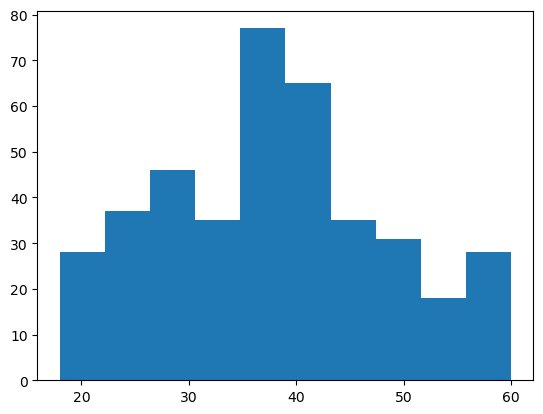

In [13]:
plt.hist(car.Age)

In [14]:
#Age is normally distributed

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

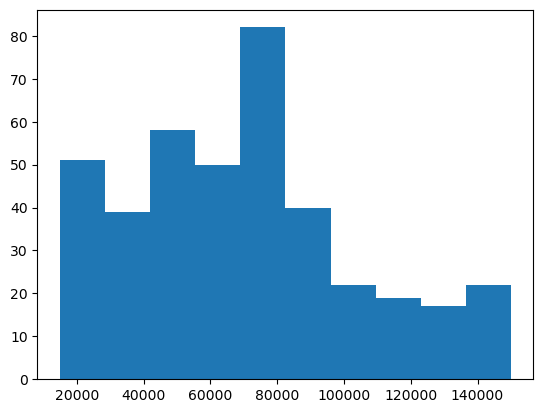

In [15]:
plt.hist(car.EstimatedSalary)

In [16]:
#normally distributed but right skewed
#so we will require Data preprocessing
car.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [17]:
#the column gender is of object type, klet us apply label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#this is model of label encoder which is applied to all the object types of the data
car['Gender']=label_encoder.fit_transform(car['Gender'])

In [18]:
#now let's apply normalizationn function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

car_norm=norm_func(car)
car_norm.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,0.467976,0.405500,0.357500
std,0.500526,0.249592,0.252570,0.479864
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.279762,0.207407,0.000000
50%,0.000000,0.452381,0.407407,0.000000
75%,1.000000,0.666667,0.540741,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [19]:
#WE HAVE DONE WITH DATA PART NOW

In [20]:
#now let us designate train data ad test data
from sklearn.model_selection import train_test_split
car_train,car_test=train_test_split(car_norm, test_size=0.2)
col_names1=list(car_train.columns)
train_X=car_train[col_names1[0:2]]
train_y=car_train[col_names1[3]]
col_names2=list(car_train.columns)
test_X=car_test[col_names2[0:2]]
test_y=car_test[col_names2[3]]

In [21]:
#model building
#build the model on the scaled data
#build a naive bayes model
#like MultinomialNB, this classifier is suitable for discrete data.
#Bernoulli Naive Bayes is designed for binary/boolean features
from sklearn.naive_bayes import BernoulliNB as BB
classifier_bb=BB()
classifier_bb.fit(train_X,train_y)
#let's evaluate the test data
test_pred_b=classifier_bb.predict(test_X)

In [22]:
#accuracy of the prediction
accuracy_test_b=np.mean(test_pred_b==test_y)
accuracy_test_b

0.6125

In [23]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(test_y, test_pred_b)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(test_y, test_pred_b)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[49  0]
 [31  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        49
         1.0       0.00      0.00      0.00        31

    accuracy                           0.61        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.38      0.61      0.47        80



C:\Users\viren\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


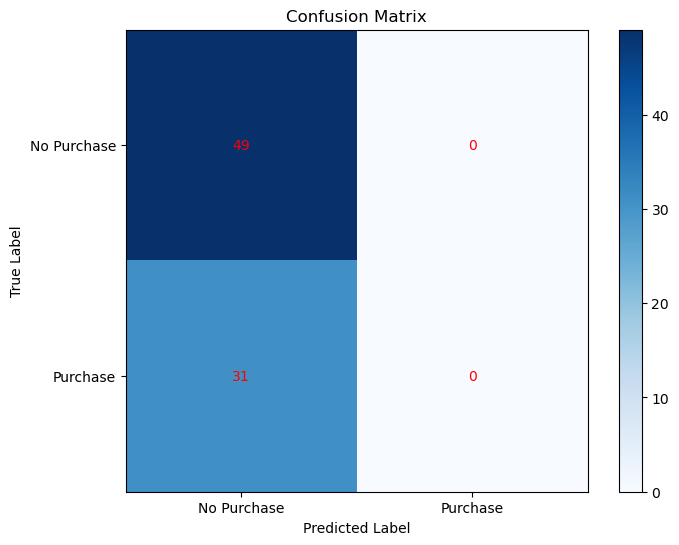

In [24]:
# Visualizing the results
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=[0, 1], labels=["No Purchase", "Purchase"])
plt.yticks(ticks=[0, 1], labels=["No Purchase", "Purchase"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

In [26]:
# Insights
#1. The test accuracy indicates how well the model predicts unseen data.
#2. The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
#3. The classification report highlights precision, recall, and F1-score for each class.

In [ ]:
#6. Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Increased Marketing Efficiency By identifying the most likely buyers, the company can target its marketing efforts precisely.
2.Focusing on the most promising leads increases the chances of converting potential customers into actual buyers.
3.The model can provide insights into the factors that influence purchase decisions. This information can be used to refine product offerings,
improve marketing strategies.
'''